In [124]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams.update({'font.size': 18})

The envelope of the incident laser field varies according to
$$
    P(t)=
    \begin{cases}
         & \sin^2(\pi t/T) \text{ for } 0 \leq t \le T \\
         & 0         \;      \text{ otherwise }
    \end{cases}
$$

with $T = 20\tau$

In [125]:
lambd = 1e-6
omega0 = 2*np.pi*3e8/lambd
tau = 2*np.pi/omega0
T = 20*tau

In [126]:
omega0/(np.pi/T)

40.0

In [127]:
def get_pulse(t):
    if t<T:
        return np.sin(omega0*t)*(np.sin(np.pi*t/T))**2
    else:
        return 0

get_pulse = np.vectorize(get_pulse)

In [128]:
T_MAX = 30*tau
SAMPLES = 1000
t = np.linspace(0,T_MAX,SAMPLES)
P = get_pulse(t)
dt = t[1]-t[0]
f_max = 1/dt

Text(0, 0.5, 'E(t)')

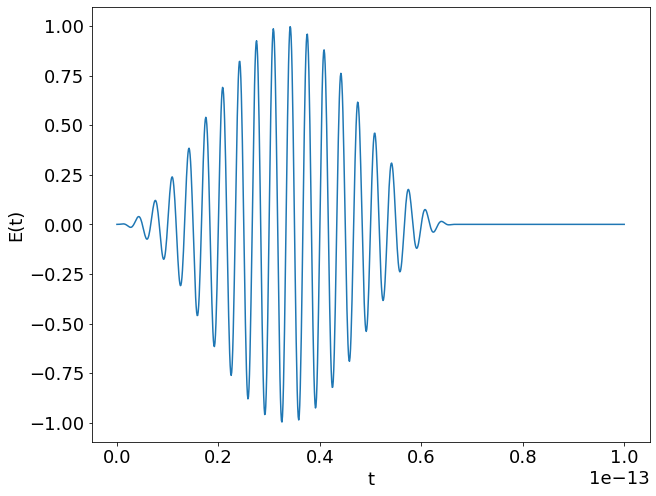

In [129]:
plt.plot(t,P)
plt.xlabel('t')
plt.ylabel('E(t)')

In [130]:
f = np.linspace(-f_max/2,f_max/2,SAMPLES)
omega = 2*np.pi*f

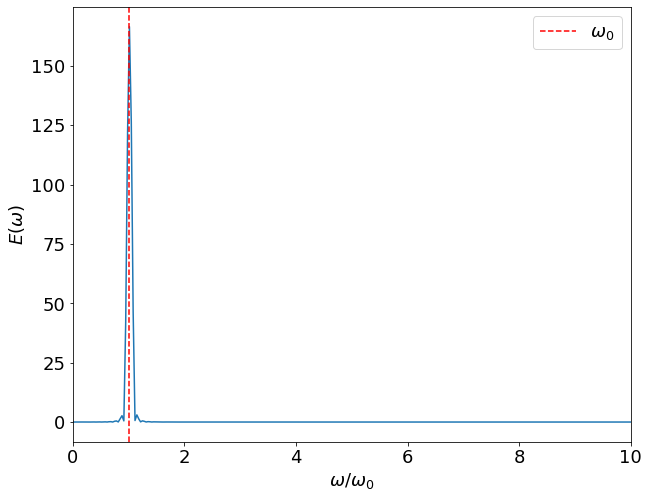

In [131]:
y = np.fft.fft(P)
y = np.fft.fftshift(y)
plt.plot(omega/omega0, np.abs(y))
plt.axvline(omega0/omega0, color='r', linestyle='--', label='$\omega_0$')
plt.xlim(0, 10)
plt.xlabel('$\omega/\omega_0$')
plt.ylabel('$E(\omega)$')
plt.legend()
plt.show()